In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


- POSTED_BY	:Category marking who has listed the property
- UNDER_CONSTRUCTION:	Under Construction or Not
- RERA	:Rera approved or Not
- BHK_NO:	Number of Rooms
- BHKORRK:	Type of property
- SQUARE_FT:	Total area of the house in square feet
- READYTOMOVE:	Category marking Ready to move or Not
- RESALE	:Category marking Resale or not
- ADDRESS	:Address of the property
- LONGITUDE	:Longitude of the property
- LATITUDE	: Latitude of the property
- TARGET(PRICE_IN_LACS)

In [4]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

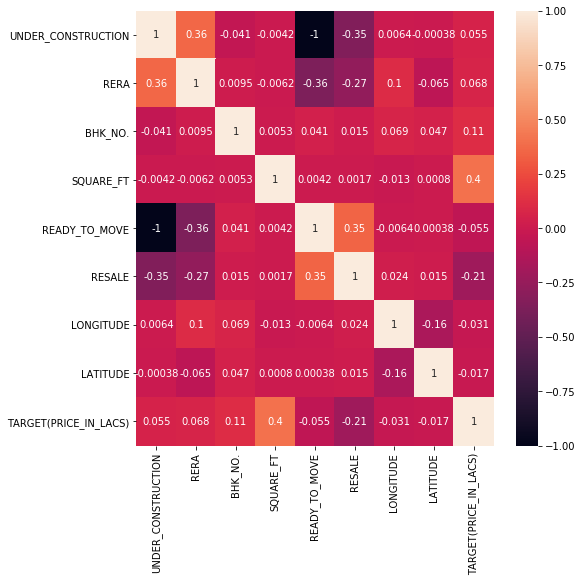

In [5]:
plt.figure(figsize=(8,8))
sb.heatmap(data.corr(),annot=True)

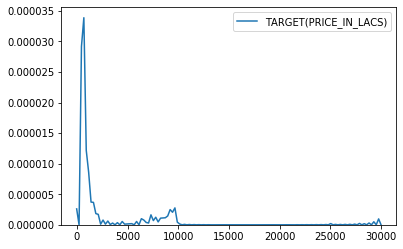

In [6]:
sb.kdeplot(data['TARGET(PRICE_IN_LACS)'])

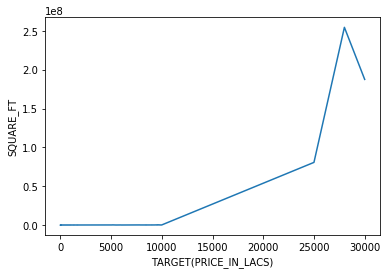

In [7]:
sb.lineplot(data['TARGET(PRICE_IN_LACS)'],data['SQUARE_FT'])

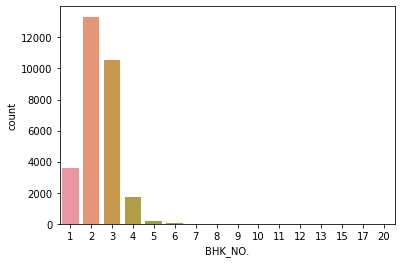

In [8]:
sb.countplot(data['BHK_NO.'])


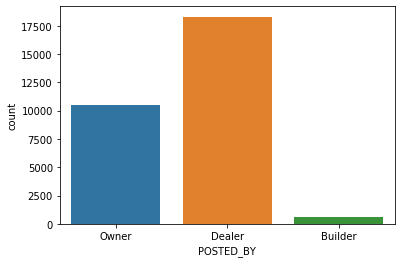

In [9]:
sb.countplot(data['POSTED_BY'])

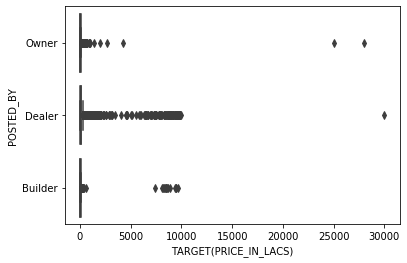

In [10]:
sb.boxplot(data['TARGET(PRICE_IN_LACS)'],data['POSTED_BY'])

In [11]:
data.groupby('POSTED_BY')['TARGET(PRICE_IN_LACS)'].describe()

,count,mean,std,min,25%,50%,75%,max
POSTED_BY,,,,,,,,
Builder,622.0,245.705627,1283.001314,2.00,27.325,41.95,63.35,9700.0
Dealer,18291.0,186.774735,743.666281,0.48,48.000,80.00,140.00,30000.0
Owner,10538.0,60.674264,371.865597,0.25,29.500,45.00,65.00,28000.0


- dealer are selling the houses 2 times than buider and owner (median) 

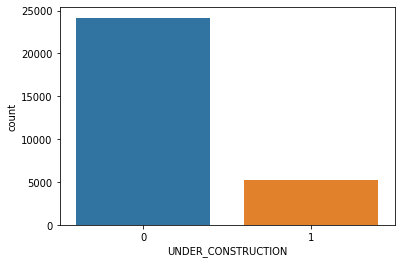

In [12]:
sb.countplot(data['UNDER_CONSTRUCTION'])


In [13]:
data.groupby('UNDER_CONSTRUCTION')['TARGET(PRICE_IN_LACS)'].describe()

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,,,,,,,,
0,24157.0,125.863279,538.824247,0.25,37.0,60.0,100.0,30000.0
1,5294.0,220.633121,1033.648672,0.48,40.0,66.0,110.0,9990.0


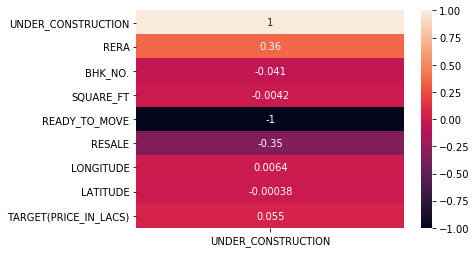

In [14]:
sb.heatmap(data.corr()[['UNDER_CONSTRUCTION']],annot=True)

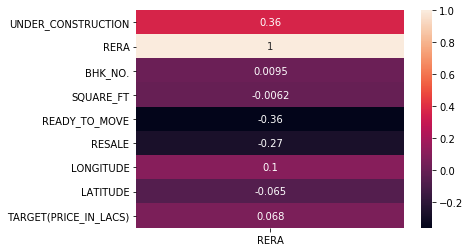

In [15]:
sb.heatmap(data.corr()[['RERA']],annot=True)

- RERA stands for the Real Estate Regulatory Authority. This was formed to bring about transparency in the real estate sector


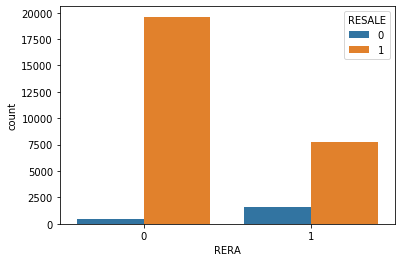

In [16]:
sb.countplot(data['RERA'],hue=data['RESALE'])

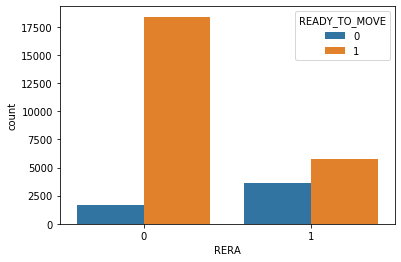

In [17]:
sb.countplot(data['RERA'],hue=data['READY_TO_MOVE'])

In [18]:
data['ADDRESS'].value_counts().head()

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
Name: ADDRESS, dtype: int64

### separating city from address

In [19]:
data['city'] = data['ADDRESS'].apply(lambda x: x.split(',')[-1])# 1 beacuse i want second term inthe list
data['city'] = data['city'].apply(lambda x: x.strip())
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [20]:
data['city'].nunique()

256

In [21]:
cities_info = data.groupby(['city'])['TARGET(PRICE_IN_LACS)'].agg(['mean','median','min','max']).reset_index()
cities_info.head()

,city,mean,median,min,max
0,Agartala,53.000000,53.0,53.0,53.0
1,Agra,39.883133,34.0,13.6,170.0
2,Ahmednagar,39.732000,22.0,14.0,340.0
3,Ajmer,36.238095,35.0,7.8,65.0
4,Akola,32.944444,27.0,16.5,55.0


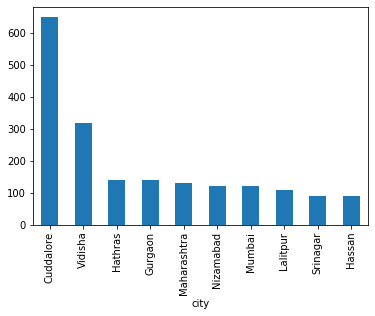

In [22]:
# Top cities having prices high 

cities_info.sort_values('median',ascending=False).head(10).plot.bar('city','median',legend =False)

In [23]:
# top cities in by count of houses
top_cities = list(data['city'].value_counts().head(20).index)
top_cities

['Bangalore',
 'Lalitpur',
 'Mumbai',
 'Pune',
 'Noida',
 'Kolkata',
 'Maharashtra',
 'Chennai',
 'Ghaziabad',
 'Jaipur',
 'Chandigarh',
 'Faridabad',
 'Mohali',
 'Vadodara',
 'Gurgaon',
 'Surat',
 'Nagpur',
 'Lucknow',
 'Indore',
 'Bhubaneswar']

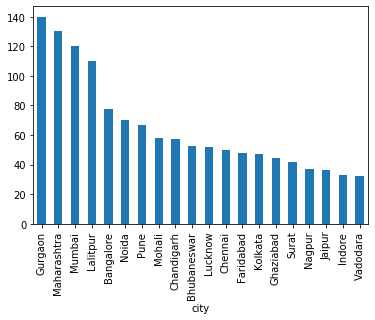

In [24]:
cities_info[cities_info['city'].isin(top_cities)].sort_values('median',ascending=False).plot.bar('city','median',legend =False)

In [25]:
data.groupby(['city','BHK_NO.'])['TARGET(PRICE_IN_LACS)'].agg(['mean','max','min','std']).head(10)

mean    max   min        std
city       BHK_NO.                                   
Agartala   2        53.000000   53.0  53.0        NaN
Agra       1        14.300000   14.3  14.3        NaN
           2        28.555556   55.0  13.6   9.477379
           3        53.088235  170.0  20.3  28.048354
           4        68.666667  100.0  32.0  34.312291
Ahmednagar 1        42.050000  340.0  14.0  85.804947
           2        34.288889   52.0  22.0   9.178840
           3        48.000000   60.0  36.0  16.970563
Ajmer      1         7.950000    8.1   7.8   0.212132
           2        33.842857   45.0  21.5   7.985582

In [26]:
data['Area'] = data['ADDRESS'].apply(lambda x: x.split(',')[-2])# 1 beacuse i want second term inthe list
data['Area'] = data['Area'].apply(lambda x: x.strip())
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,Area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town


In [27]:
data['Area'].nunique()

5866

In [28]:
X = data.drop(['ADDRESS','LONGITUDE','LATITUDE','Area','city'],axis=1)
Y = data['TARGET(PRICE_IN_LACS)']

In [29]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5


In [30]:
posted_by = pd.get_dummies(X['POSTED_BY'], drop_first=True)
types = pd.get_dummies(X['BHK_OR_RK'], drop_first=True, prefix='type')
train = pd.concat([X, posted_by], axis=1)
train = pd.concat([train, types], axis=1)
train = train.drop(['POSTED_BY', 'BHK_OR_RK'], axis=1)
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Dealer,Owner,type_RK
0,0,0,2,1300.236407,1,1,55.0,0,1,0
1,0,0,2,1275.000000,1,1,51.0,1,0,0
2,0,0,2,933.159722,1,1,43.0,0,1,0
3,0,1,2,929.921143,1,1,62.5,0,1,0
4,1,0,2,999.009247,0,1,60.5,1,0,0


In [31]:
train.shape

(29451, 10)

In [32]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = train['TARGET(PRICE_IN_LACS)']

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.335675323203976

In [36]:
y_pred1 = lr.predict(X_train)
r2_score(y_train,y_pred1)

0.17005403995519774

### Applying log transformation
    

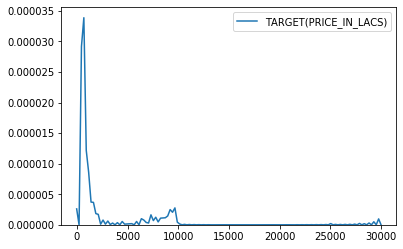

In [37]:
sb.kdeplot(data['TARGET(PRICE_IN_LACS)'])

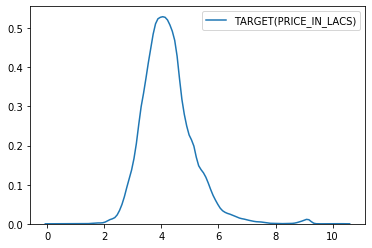

In [38]:
sb.kdeplot(np.log1p(data['TARGET(PRICE_IN_LACS)']))

In [39]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

# check score
print('Linear regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_lr))
print('Test prediction score:', r2_score(y_test, pred_test_lr))

Linear regressor prediction score
Train prediction score: 0.3575959904655899
Test prediction score: 0.3384934698886767


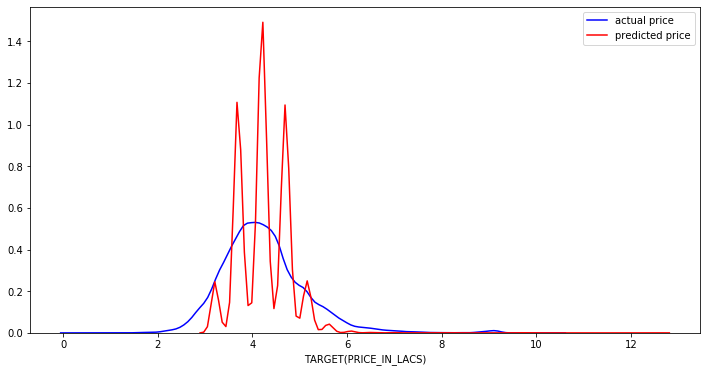

In [44]:
plt.figure(figsize=(12,6))
ax = sb.distplot(y_train,hist=False,color='b',label='actual price')
sb.distplot(pred_train_lr,hist=False,color='r',label='predicted price',ax=ax)
plt.show()

Text(0.5, 1.0, 'Residual Plot')

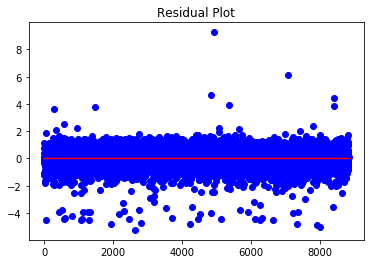

In [46]:
# residual plot
x = [i for i in range(1,len(y_pred)+1)]
x_plot =plt.scatter(x,(pred_test_lr-y_test),c='blue')
plt.plot(x,[0]*len(y_pred),c='red')
plt.title('Residual Plot')

### using Ridge

In [52]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


from sklearn.linear_model import Ridge,Lasso
#alpha_range = [0.01,0.05,0.5,5]
ridge = Ridge(alpha=0.01,normalize=True)
ridge.fit(X_train,y_train)



pred_train_ridge = ridge.predict(X_train)
pred_test_ridge = ridge.predict(X_test)

# check score
print('Ridge regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_ridge))
print('Test prediction score:', r2_score(y_test, pred_test_ridge))

Ridge regressor prediction score
Train prediction score: 0.3485131068848826
Test prediction score: 0.3589741816133677


### Decision Tree

In [53]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10,random_state=30)
dtr.fit(X_train,y_train)
pred_train_dt = dtr.predict(X_train)
pred_test_dt = dtr.predict(X_test)

# check score
print('Random Forest regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_dt))
print('Test prediction score:', r2_score(y_test, pred_test_dt))

Random Forest regressor prediction score
Train prediction score: 0.6281277259644368
Test prediction score: 0.5352679765992541


### Random Forest

In [50]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,random_state=30)
rf.fit(X_train,y_train)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

# check score
print('Random Forest regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_rf))
print('Test prediction score:', r2_score(y_test, pred_test_rf))

Random Forest regressor prediction score
Train prediction score: 0.6491453464738741
Test prediction score: 0.5694987301536604


### not considering  outliers

In [54]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,Area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town


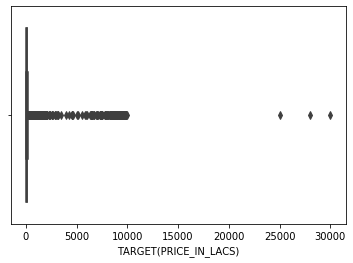

In [56]:
sb.boxplot(data['TARGET(PRICE_IN_LACS)'])

In [60]:
q1 = data['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q3 = data['TARGET(PRICE_IN_LACS)'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr
ub

193.0

In [85]:
len(data[data['TARGET(PRICE_IN_LACS)']<ub])

29293

In [63]:
data['TARGET(PRICE_IN_LACS)'].quantile(0.99)

1045.0

In [84]:
len(data[data['TARGET(PRICE_IN_LACS)']<9000])

29387

In [81]:
q1 = data['SQUARE_FT'].quantile(0.25)
q3 = data['SQUARE_FT'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr
ub

2526.6886156

In [93]:
len(data[data['SQUARE_FT']<150000])

29418

In [94]:
data1 = data[(data['BHK_NO.']<7)&(data['TARGET(PRICE_IN_LACS)']<15000)&(data['SQUARE_FT']<150000)]
data1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,Area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town


In [95]:
data1.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29376.000000,29376.000000,29376.000000,29376.000000,29376.000000,29376.000000,29376.000000,29376.000000,29376.000000
mean,0.179636,0.318117,2.379902,1658.540744,0.820364,0.930181,21.301640,76.835321,132.279170
std,0.383891,0.465753,0.809692,5887.843096,0.383891,0.254846,6.203449,10.569736,536.932209
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,900.007934,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1173.983250,1.000000,1.000000,20.750000,77.324137,61.700000
75%,0.000000,1.000000,3.000000,1550.120565,1.000000,1.000000,26.900926,77.821037,100.000000
max,1.000000,1.000000,6.000000,149969.078500,1.000000,1.000000,59.912884,152.962676,9990.000000


In [96]:
X = data1.drop(['ADDRESS','LONGITUDE','LATITUDE','Area'],axis=1)
Y = data1['TARGET(PRICE_IN_LACS)']

In [97]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5,Kolkata


In [101]:
posted_by = pd.get_dummies(X['POSTED_BY'], drop_first=True)
types = pd.get_dummies(X['BHK_OR_RK'], drop_first=True, prefix='type')
cities = pd.get_dummies(X['city'],drop_first=True)
train = pd.concat([X, posted_by], axis=1)
train = pd.concat([train, types], axis=1)
train = pd.concat([train, cities], axis=1)
train = train.drop(['POSTED_BY', 'BHK_OR_RK','city'], axis=1)
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Dealer,Owner,type_RK,...,Varanasi,Vellore,Vijayawada,Visakhapatnam,Visnagar,Vizianagaram,Warangal,Wardha,Washim,Yavatmal
0,0,0,2,1300.236407,1,1,55.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,51.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,43.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,929.921143,1,1,62.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,999.009247,0,1,60.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

# check score
print('Linear regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_lr))
print('Test prediction score:', r2_score(y_test, pred_test_lr))

Linear regressor prediction score
Train prediction score: 0.7085541192552822
Test prediction score: 0.7112190963078799


In [111]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


from sklearn.linear_model import Ridge,Lasso
#alpha_range = [0.01,0.05,0.5,5]
ridge = Ridge(alpha=0.01,normalize=True)
ridge.fit(X_train,y_train)



pred_train_ridge = ridge.predict(X_train)
pred_test_ridge = ridge.predict(X_test)

# check score
print('Ridge regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_ridge))
print('Test prediction score:', r2_score(y_test, pred_test_ridge))

Ridge regressor prediction score
Train prediction score: 0.7120033708806124
Test prediction score: 0.7011139865717697


In [113]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train,y_train)
pred_train_dt = dtr.predict(X_train)
pred_test_dt = dtr.predict(X_test)

# check score
print('Random Forest regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_dt))
print('Test prediction score:', r2_score(y_test, pred_test_dt))

Random Forest regressor prediction score
Train prediction score: 0.8093655508740303
Test prediction score: 0.7501743569081055


In [114]:
x = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,random_state=30)
rf.fit(X_train,y_train)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

# check score
print('Random Forest regressor prediction score')
print('Train prediction score:', r2_score(y_train,pred_train_rf))
print('Test prediction score:', r2_score(y_test, pred_test_rf))

Random Forest regressor prediction score
Train prediction score: 0.8249369390620939
Test prediction score: 0.7845329683890847


### K fold Cross Validation

In [128]:
X = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
Y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
lr = LinearRegression()


scores=[]

for i in range(5):
    result = next(kf.split(X),None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = Y.iloc[result[0]]
    y_test = Y.iloc[result[1]]
    
    model = lr.fit(x_train, y_train)
    prediction = lr.predict(x_test)
    scores.append(model.score(x_test,y_test))
    
print('Scores from each prediction : ',scores)
print('Average K-fold score : ',np.mean(scores))

Scores from each prediction :  [0.6936258348939299, 0.6991889627937462, 0.7071105673587539, 0.7150876954666203, 0.6774491024884852]
Average K-fold score :  0.6984924326003071


In [120]:
X = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
Y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
dtr = DecisionTreeRegressor()


scores=[]

for i in range(5):
    result = next(kf.split(X),None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = Y.iloc[result[0]]
    y_test = Y.iloc[result[1]]
    model = dtr.fit(x_train, y_train)
    prediction = dtr.predict(x_test)
    scores.append(model.score(x_test,y_test))
    
print('Scores from each prediction : ',scores)
print('Average K-fold score : ',np.mean(scores))

Scores from each prediction :  [0.6899021986646037, 0.7016907881605392, 0.6934908490478193, 0.6896016669070961, 0.6924188325424443]
Average K-fold score :  0.6934208670645006


In [121]:
X = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
Y = np.log1p(train['TARGET(PRICE_IN_LACS)'])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
dtr = RandomForestRegressor()


scores=[]

for i in range(5):
    result = next(kf.split(X),None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = Y.iloc[result[0]]
    y_test = Y.iloc[result[1]]
    model = dtr.fit(x_train, y_train)
    prediction = dtr.predict(x_test)
    scores.append(model.score(x_test,y_test))
    
print('Scores from each prediction : ',scores)
print('Average K-fold score : ',np.mean(scores))

Scores from each prediction :  [0.7960320083886662, 0.7881815786359538, 0.772562844339082, 0.791981826268649, 0.790975204983024]
Average K-fold score :  0.7879466925230749
